In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'sales-of-a-supermarket:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4673128%2F7947184%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240401%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240401T095302Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0e2f0dba42848fdd8e788a1f69d2b1472b41725dc245506cb3c04bc1bea3d588bde3cf4c749b6978934a8b0a5755a9b23c0330e56c2e50fbb67e3f4032c234c999a2434af86c7593f9be67409b5b4b872fe3b2154f93256bf83eb13e9431c5118e5d9df06e7273bbc1e8f437c556af89b847c60fe3ad6995162f13b65afb0001866976a1903060d6a861b71312228418f638a6b87ac5375ee035ef986606a5d3300711c9e2066d9f210492fcaedaf201195781d9e5f6b7fccc99b3b5600483573558890ba9695142b41dff86a7864c30d62c3cc594cec5a80f3dafd65cbb29d5790f3d520c1f793390bbf586a2c18f742062fa8e8016f3425c7d0d895d1f388b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 36783 bytes downloaded
Downloaded and uncompressed: sales-of-a-supermarket
Data source import complete.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/sales-of-a-supermarket/supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
#datetime
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
#df['Time'] = pd.to_datetime(df['Time']

In [7]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
df.duplicated().sum()

0

**EDA nad Visualization**

In [9]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6


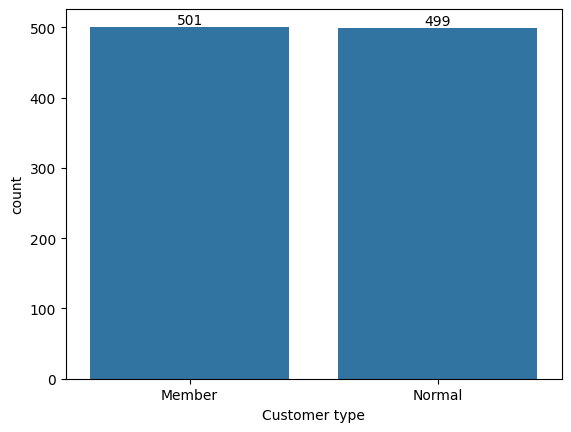

In [10]:
ax = sns.countplot(x=df['Customer type'])
ax.bar_label(ax.containers[0])
plt.show()

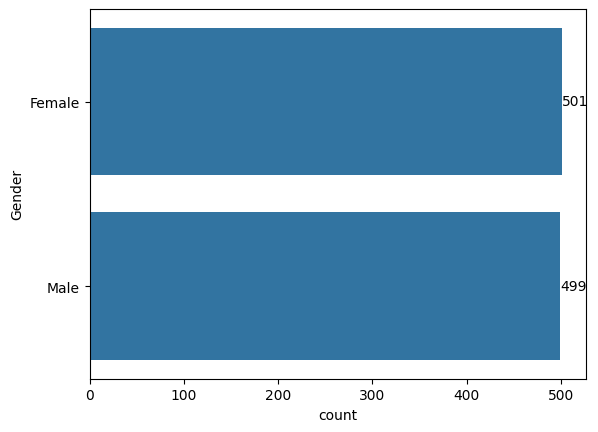

In [11]:
ax = sns.countplot(y=df['Gender'])
ax.bar_label(ax.containers[0])
plt.show()

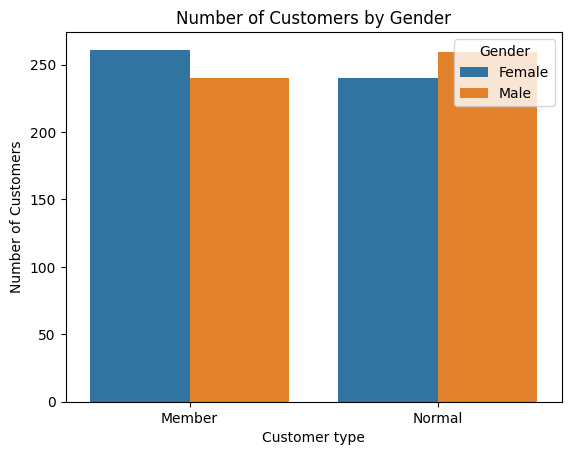

In [12]:
sns.countplot(data=df, x='Customer type', hue='Gender')
plt.xlabel('Customer type')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Gender')
plt.show()

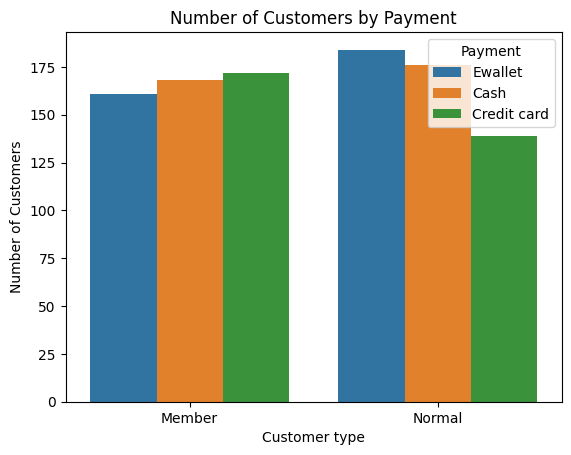

In [13]:
sns.countplot(data=df, x='Customer type', hue='Payment')
plt.xlabel('Customer type')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Payment')
plt.show()

In [14]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


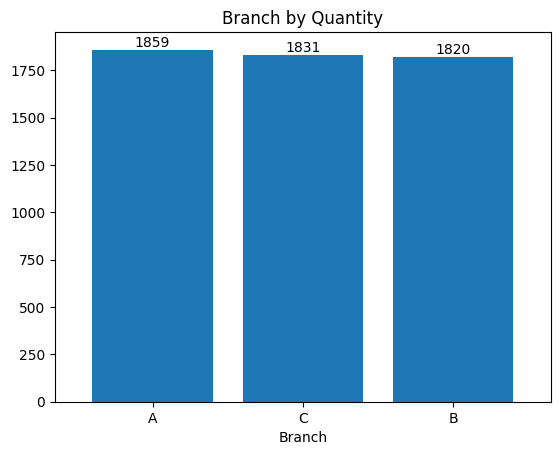

In [15]:
bra_Q = df.groupby('Branch')['Quantity'].sum().sort_values(ascending=False)
ax = bra_Q.plot(kind='bar', width=0.8)
ax.bar_label(ax.containers[0])
plt.title('Branch by Quantity')
plt.xticks(rotation=0)
plt.show()

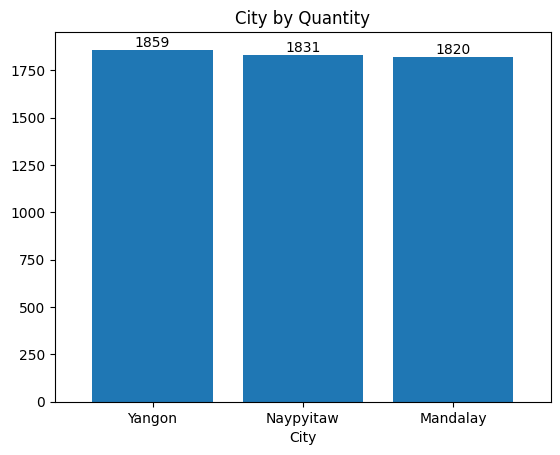

In [16]:
City_Q = df.groupby('City')['Quantity'].sum().sort_values(ascending=False)
ax = City_Q.plot(kind='bar', width=0.8)
ax.bar_label(ax.containers[0])
plt.title('City by Quantity')
plt.xticks(rotation=0)
plt.show()

In [17]:
df.groupby(['City', 'Branch'])['Quantity'].sum().reset_index()


,City,Branch,Quantity
0,Mandalay,B,1820
1,Naypyitaw,C,1831
2,Yangon,A,1859


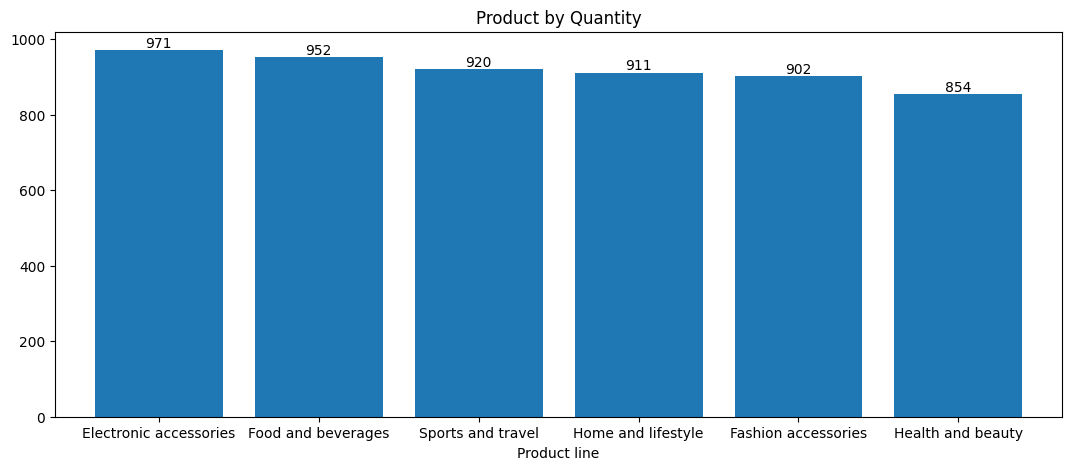

In [18]:
Product_Q = df.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(13,5))
ax = Product_Q.plot(kind='bar', width=0.8)
ax.bar_label(ax.containers[0])
plt.title('Product by Quantity')
plt.xticks(rotation=0)
plt.show()

In [19]:
df.groupby(['City', 'Product line'])['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)

,City,Product line,Quantity
16,Yangon,Home and lifestyle,371
8,Naypyitaw,Food and beverages,369
7,Naypyitaw,Fashion accessories,342
17,Yangon,Sports and travel,333
6,Naypyitaw,Electronic accessories,333
12,Yangon,Electronic accessories,322
5,Mandalay,Sports and travel,322
3,Mandalay,Health and beauty,320
0,Mandalay,Electronic accessories,316
14,Yangon,Food and beverages,313


In [20]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6


In [21]:
df.Date.unique()

array(['2019-01-05T00:00:00.000000000', '2019-03-08T00:00:00.000000000',
       '2019-03-03T00:00:00.000000000', '2019-01-27T00:00:00.000000000',
       '2019-02-08T00:00:00.000000000', '2019-03-25T00:00:00.000000000',
       '2019-02-25T00:00:00.000000000', '2019-02-24T00:00:00.000000000',
       '2019-01-10T00:00:00.000000000', '2019-02-20T00:00:00.000000000',
       '2019-02-06T00:00:00.000000000', '2019-03-09T00:00:00.000000000',
       '2019-02-12T00:00:00.000000000', '2019-02-07T00:00:00.000000000',
       '2019-03-29T00:00:00.000000000', '2019-01-15T00:00:00.000000000',
       '2019-03-11T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2019-01-21T00:00:00.000000000', '2019-03-05T00:00:00.000000000',
       '2019-03-15T00:00:00.000000000', '2019-02-17T00:00:00.000000000',
       '2019-03-02T00:00:00.000000000', '2019-03-22T00:00:00.000000000',
       '2019-03-10T00:00:00.000000000', '2019-01-25T00:00:00.000000000',
       '2019-01-28T00:00:00.000000000', '2019-01-07

In [22]:
#year
yearly_gross_income = df['gross income'].sum()
yearly_gross_income

15379.368999999999

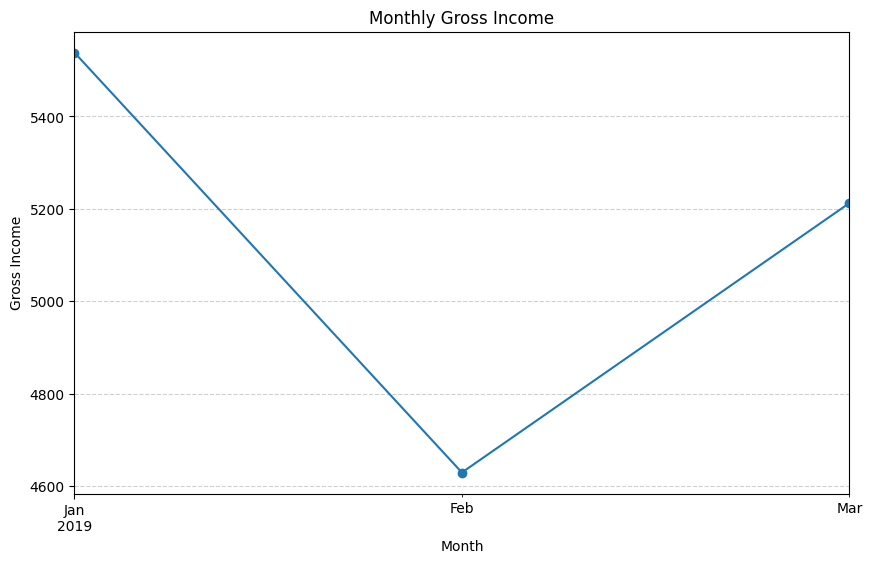

In [23]:
monthly_gross_income = df.groupby(df['Date'].dt.to_period('M'))['gross income'].sum()

# Membuat plot garis
monthly_gross_income.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Monthly Gross Income')
plt.xlabel('Month')
plt.ylabel('Gross Income')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

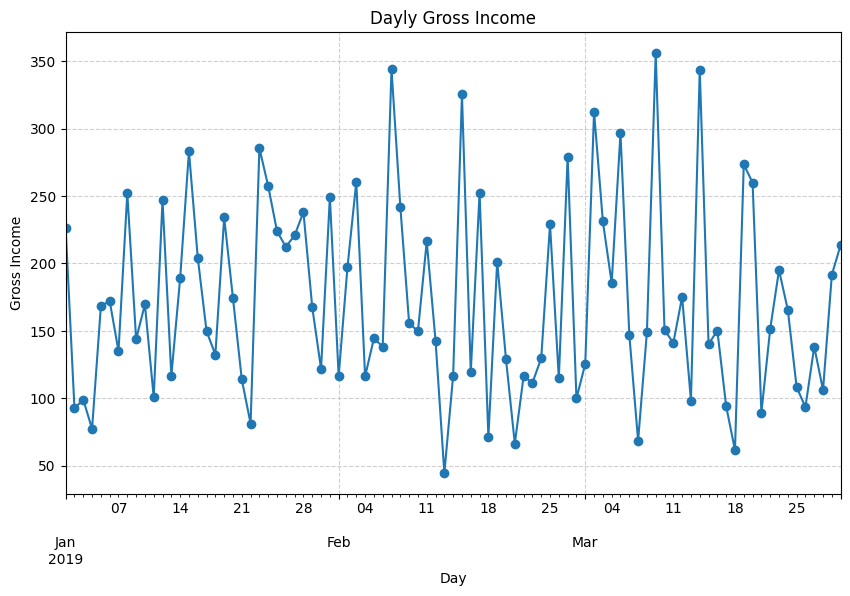

In [24]:
# day income
Dayly_gross_income = df.groupby(df['Date'].dt.to_period('D'))['gross income'].sum()

# Membuat plot garis
Dayly_gross_income.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Dayly Gross Income')
plt.xlabel('Day')
plt.ylabel('Gross Income')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [25]:
average_rating_by_product = df.groupby('Product line')['Rating'].mean()

# Menemukan produk dengan rating tertinggi
product_with_highest_rating = average_rating_by_product.idxmax()
highest_rating = average_rating_by_product.max()

print("Produk dengan rating tertinggi adalah:", product_with_highest_rating)
print("Rating tertinggi:", highest_rating)

Produk dengan rating tertinggi adalah: Food and beverages
Rating tertinggi: 7.113218390804598


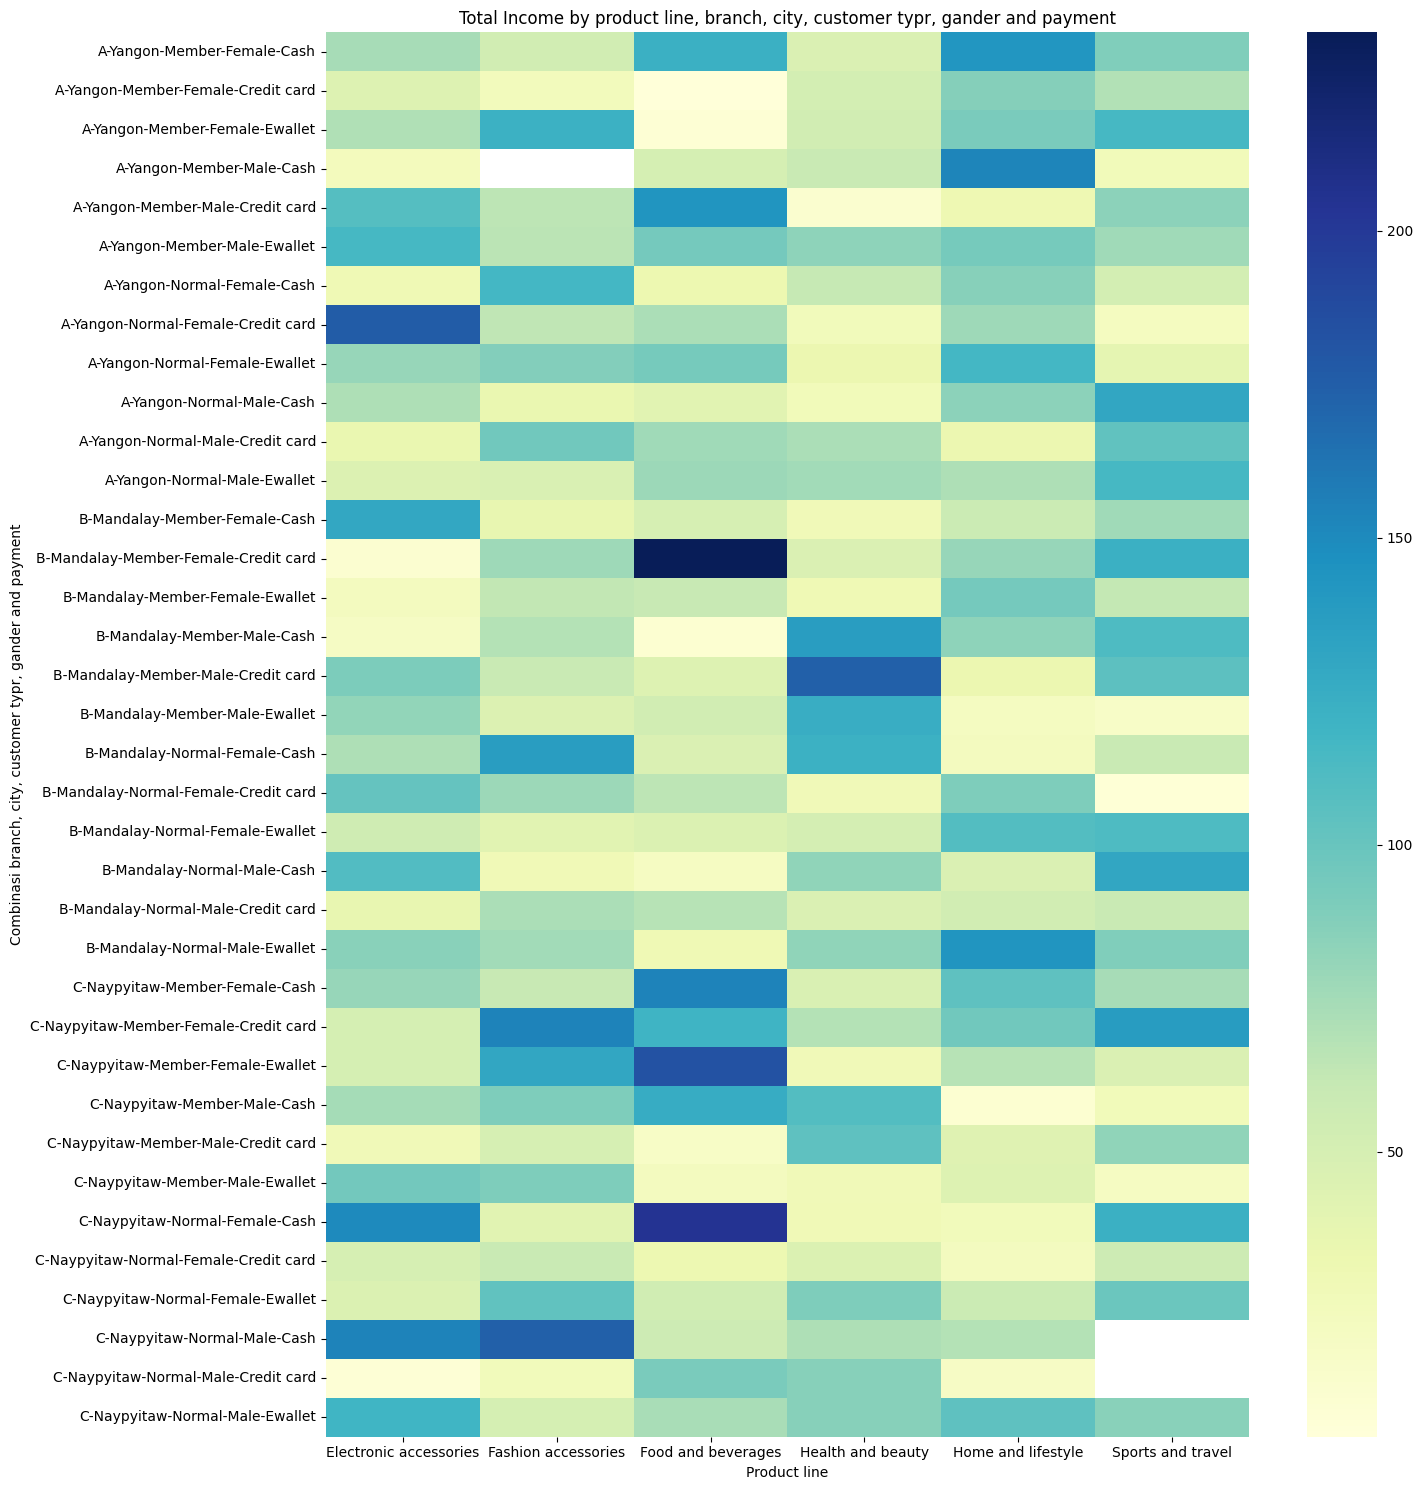

In [26]:
pivot_table = df.pivot_table(index=['Branch', 'City', 'Customer type', 'Gender', 'Payment'], columns=['Product line'], values='gross income', aggfunc='sum')

# Visualisasi menggunakan heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(pivot_table, annot=False, fmt=".1f", cmap="YlGnBu")
plt.title('Total Income by product line, branch, city, customer typr, gander and payment')
plt.ylabel('Combinasi branch, city, customer typr, gander and payment')
plt.xlabel('Product line')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()